<a href="https://colab.research.google.com/github/shobika814/bigmart-sales/blob/main/big_mart_shobi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [256]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# BIG MART SALES ANALYSIS

In [257]:
import numpy as np
import pandas as pd
#importing the required libraries for the Analysis of the project.

In [258]:
train=pd.read_csv('/content/drive/MyDrive/Train.csv')

In [259]:
test=pd.read_csv('/content/drive/MyDrive/Test.csv')

# Data Sructure and Content

In [260]:
train.shape

(8523, 12)

In [261]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [262]:
train.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [263]:
train.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [264]:
train.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
8518,False
8519,False
8520,False
8521,False


In [265]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [266]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [267]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [268]:
train['Item_Type'].value_counts()

,count
Item_Type,
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Baking Goods,648
Health and Hygiene,520
Soft Drinks,445


In [269]:
train['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [270]:
test.shape

(5681, 11)

In [271]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [272]:
test.isnull().sum()

,0
Item_Identifier,0
Item_Weight,976
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1606
Outlet_Location_Type,0


In [273]:
test.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [274]:
test.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
5676,False
5677,False
5678,False
5679,False


In [275]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [276]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [277]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [278]:
test['Item_Type'].value_counts()

,count
Item_Type,
Snack Foods,789
Fruits and Vegetables,781
Household,638
Frozen Foods,570
Dairy,454
Baking Goods,438
Canned,435
Health and Hygiene,338
Meat,311


In [279]:
test['Item_Fat_Content'].value_counts()

#display value counts for 'Item_Fat_Content'

,count
Item_Fat_Content,
Low Fat,3396
Regular,1935
LF,206
reg,78
low fat,66


DATA PREPROCESSING

In [280]:
train['Item_Fat_Content'].replace(['LF','low fat','reg'],['Low Fat','Low Fat','Regular'],inplace=True)

# replace inconsistent values in 'Item_Fat_Content'

In [281]:
train['Item_Fat_Content'].value_counts()

#display updated value counts for 'Item_Fat_Content'

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [282]:
test['Item_Fat_Content'].value_counts()

#display value counts for 'Item_Fat_Content'

,count
Item_Fat_Content,
Low Fat,3396
Regular,1935
LF,206
reg,78
low fat,66


In [283]:
test['Item_Fat_Content'].replace(['LF','low fat','reg'],['Low Fat','Low Fat','Regular'],inplace=True)

# replace inconsistent values in 'Item_Fat_Content'

In [284]:
test['Item_Fat_Content'].value_counts()

#display updated value counts for 'Item_Fat_Content'

,count
Item_Fat_Content,
Low Fat,3668
Regular,2013


In [285]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors

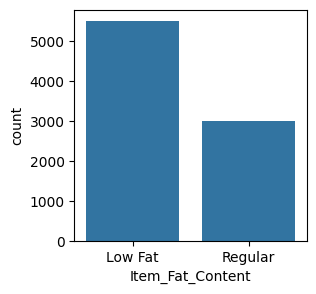

In [286]:
plt.figure(figsize=(3,3))
sns.countplot(x='Item_Fat_Content',data=train)
plt.xlabel('Item_Fat_Content')
plt.show()

# A countplot is a type of data visualization used in python.
# It is particularly useful for visualising the count occurences of each unique value.
# The sns.countplot function is used to create the count plot.
# The items have more low fat content and moderate regular fat content.

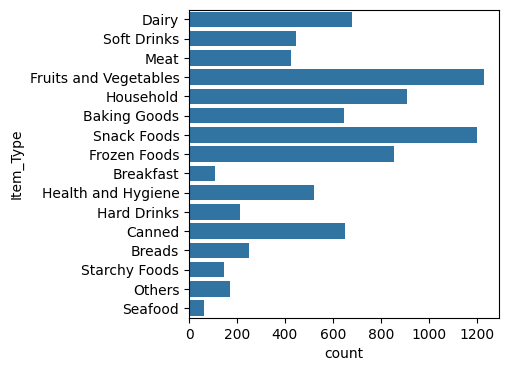

In [287]:
plt.figure(figsize=(4,4))
sns.countplot(y='Item_Type',data=train)
plt.ylabel('Item_Type')
plt.show()

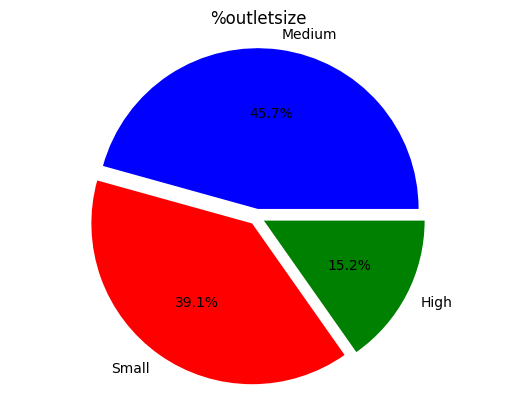

In [288]:
outletsize=train['Outlet_Size'].value_counts(normalize=True)*100
explode=(0.05,0.05,0.05)
colors=('blue','red','green')
plt.pie(outletsize,labels=outletsize.index,autopct='%1.1f%%',explode=explode,colors=colors)
plt.title('%outletsize')
plt.axis('equal')
plt.show()

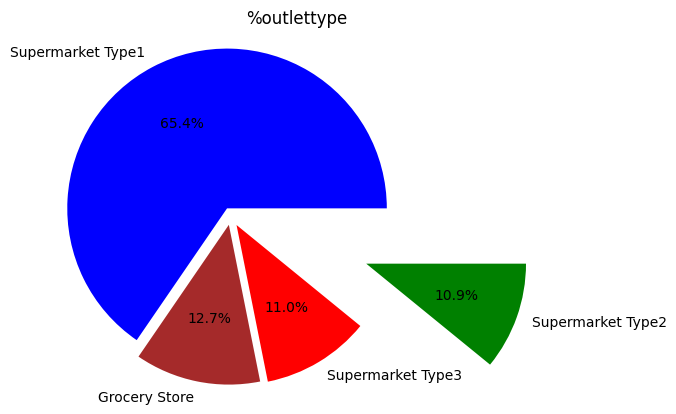

In [289]:
outlettype=train['Outlet_Type'].value_counts(normalize=True)*100
explode=(0.05,0.06,0.07,0.9)
colors=('blue','brown','red','green')
plt.pie(outlettype,labels=outlettype.index,autopct='%1.1f%%',explode=explode,colors=colors)
plt.title('%outlettype')
plt.axis('equal')
plt.show()

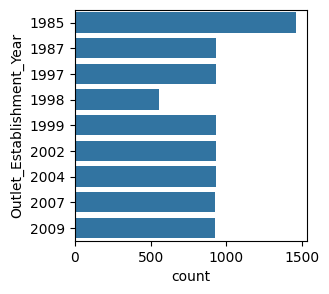

In [290]:
plt.figure(figsize=(3,3))
sns.countplot(y='Outlet_Establishment_Year',data=train)
plt.ylabel('Outlet_Establishment_Year')
plt.show()

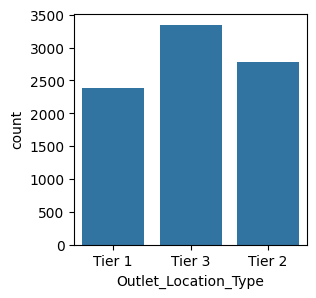

In [291]:
plt.figure(figsize=(3,3))
sns.countplot(x='Outlet_Location_Type',data=train)
plt.xlabel('Outlet_Location_Type')
plt.show()

In [292]:
 # To handle the Missing and null values
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [293]:
le=LabelEncoder()
for col in train.columns:
    if train[col].dtype=='object':
        train[col]=le.fit_transform(train[col])

In [294]:
train['Outlet_Size'].dtypes
#display the data type of 'Outlet_Size' column

dtype('int64')

In [295]:
train.head()
#display updated few rows of the datasets

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,3,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [296]:
imputer=SimpleImputer(strategy='mean')
missing_coloums=['Item_Weight','Outlet_Size']
train[missing_coloums]=imputer.fit_transform(train[missing_coloums])

In [297]:
train.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [298]:
le=LabelEncoder()
for col in test.columns:
  if test[col].dtype=='object':
    test[col]=le.fit_transform(test[col])

In [299]:
test['Outlet_Size'].dtypes
#display the data type of 'Outlet_Size' columns

dtype('int64')

In [300]:
test.head()
#display updated few rows of the datasets

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300,1,0.038428,4,87.3198,2,2007,3,1,1
2,1406,14.600,0,0.099575,11,241.7538,0,1998,3,2,0
3,809,7.315,0,0.015388,13,155.0340,2,2007,3,1,1
4,1184,NaN,1,0.118599,4,234.2300,5,1985,1,2,3


In [301]:
imputer=SimpleImputer(strategy='mean')
missing_coloums=['Item_Weight','Outlet_Size']
test[missing_coloums]=imputer.fit_transform(test[missing_coloums])

In [302]:
# create SimpleImputer object for mean imputation in the TRAIN SET
imputer = SimpleImputer(strategy='mean')

# select columns with missing values
cols_with_missing = ["Item_Weight", 'Outlet_Size']

# impute missing values in selected columns
train[cols_with_missing] = imputer.fit_transform(train[cols_with_missing])

In [303]:
test.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


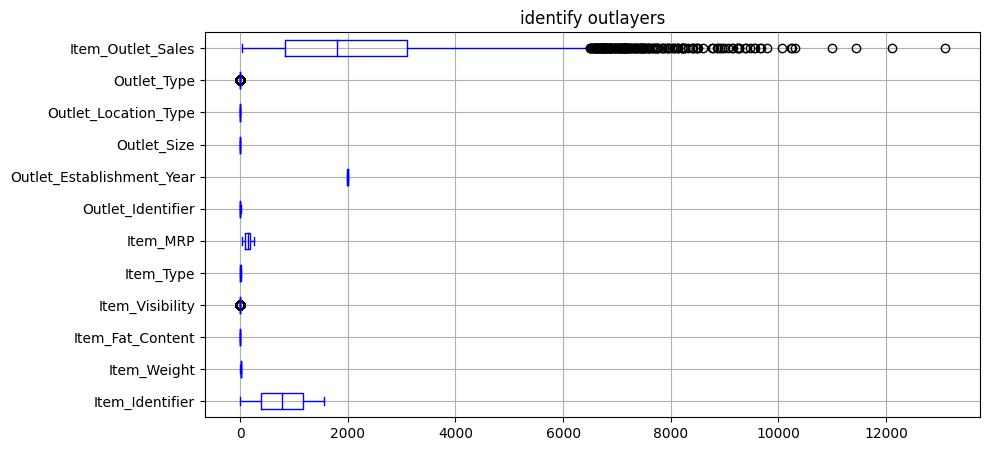

In [304]:
number_coloumns=train.select_dtypes(include=['int64','float64'])
fig,ax=plt.subplots(figsize=(10,5))
number_coloumns.boxplot(ax=ax,vert=False,color='blue')
plt.title('identify outlayers')
plt.show()

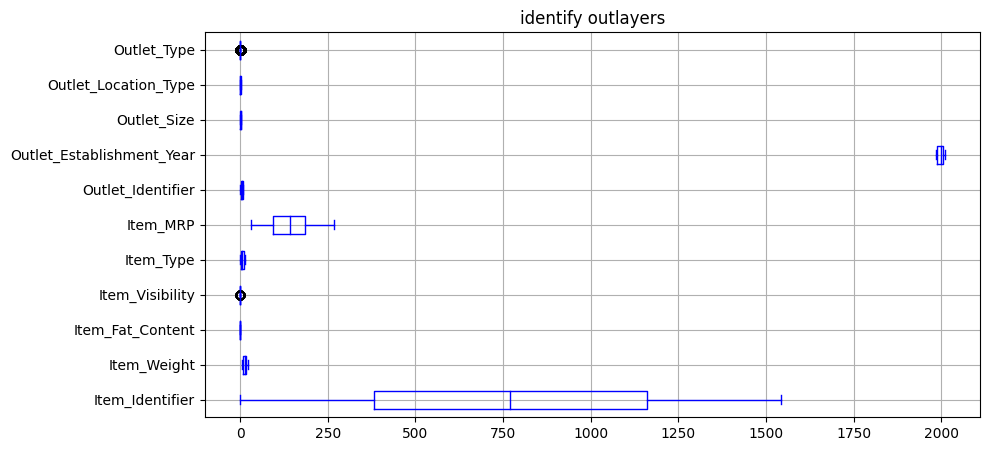

In [305]:
number_coloumns=test.select_dtypes(include=['int64','float64'])
fig,ax=plt.subplots(figsize=(10,5))
number_coloumns.boxplot(ax=ax,vert=False,color='blue')
plt.title('identify outlayers')
plt.show()

In [306]:
q1=np.percentile(train['Item_Outlet_Sales'],25)
q3=np.percentile(train['Item_Outlet_Sales'],75)
iqr=q3-q1
print('q1',q1)
print('q3',q3)
print('IQR',iqr)

q1 834.2474
q3 3101.2964
IQR 2267.049


In [307]:
upperlimit=q3+1.5*iqr
lowerlimit=q1-1.5*iqr
print('upperlimit',upperlimit)
print('lowerlimit',lowerlimit)

upperlimit 6501.8699
lowerlimit -2566.3261


In [308]:
train['Outlet_Sales_Square']=np.cbrt(train['Item_Outlet_Sales'])
#creates a new column named Outlet_Sales_Square in the DataFrame train, where each value is the cube root of the corresponding value in the Item_Outlet_Sales column.

In [309]:
train['Outlet_Sales_Cube']=np.cbrt(train['Item_Outlet_Sales'])

#creates a new column named Outlet_Sales_cube in the DataFrame train, where each value is the cube root of the corresponding value in the Item_Outlet_Sales column.

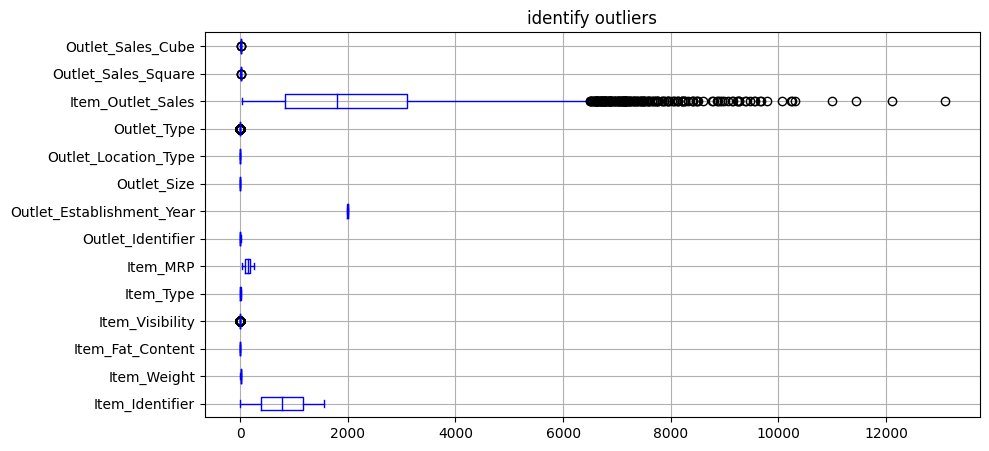

In [310]:
number_columns=train.select_dtypes(include=['int64','float64'])
fig,ax=plt.subplots(figsize=(10,5))
number_columns.boxplot(ax=ax,vert=False,color='blue')
plt.title('identify outliers')
plt.show()

<ipython-input-311-2c7d3778c2e2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=train['Item_Outlet_Sales'],kde=True ,rug=True)


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

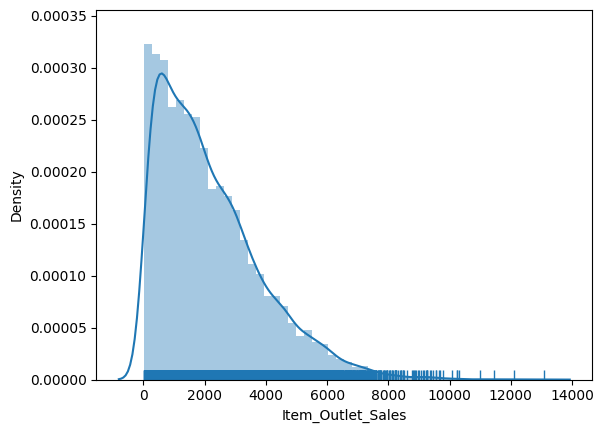

In [311]:
sns.distplot(a=train['Item_Outlet_Sales'],kde=True ,rug=True)

<ipython-input-312-ca45caa581af>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=train['Outlet_Sales_Cube'],kde=True ,rug=True)


<Axes: xlabel='Outlet_Sales_Cube', ylabel='Density'>

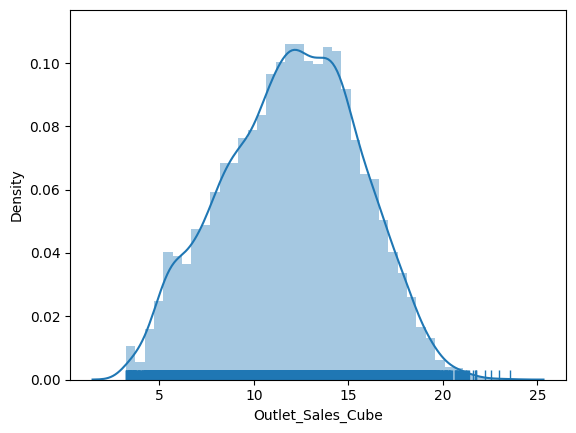

In [312]:
sns.distplot(a=train['Outlet_Sales_Cube'],kde=True ,rug=True)

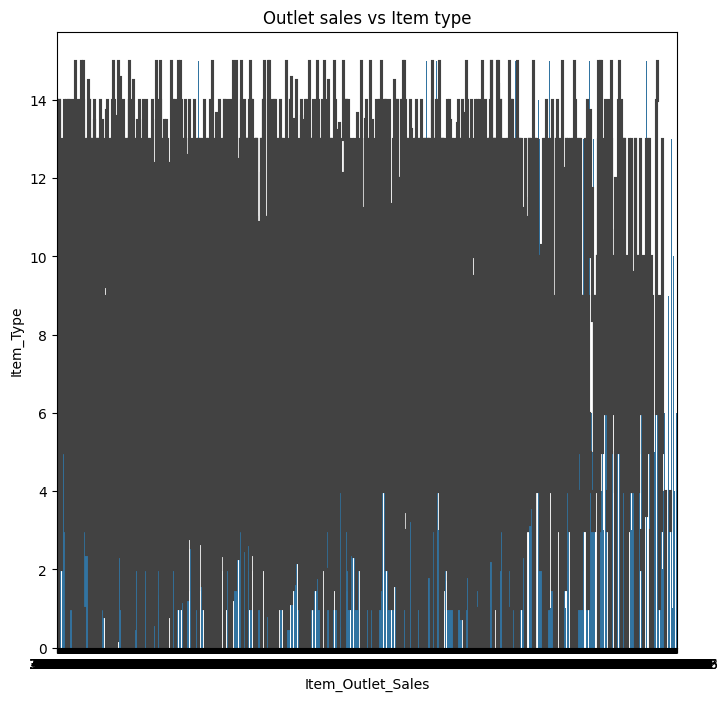

In [313]:
plt.figure(figsize=(8,8))
sns.barplot(x='Item_Outlet_Sales',y='Item_Type',data=train).set(title='Outlet sales vs Item type')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Item_Type')
plt.show()

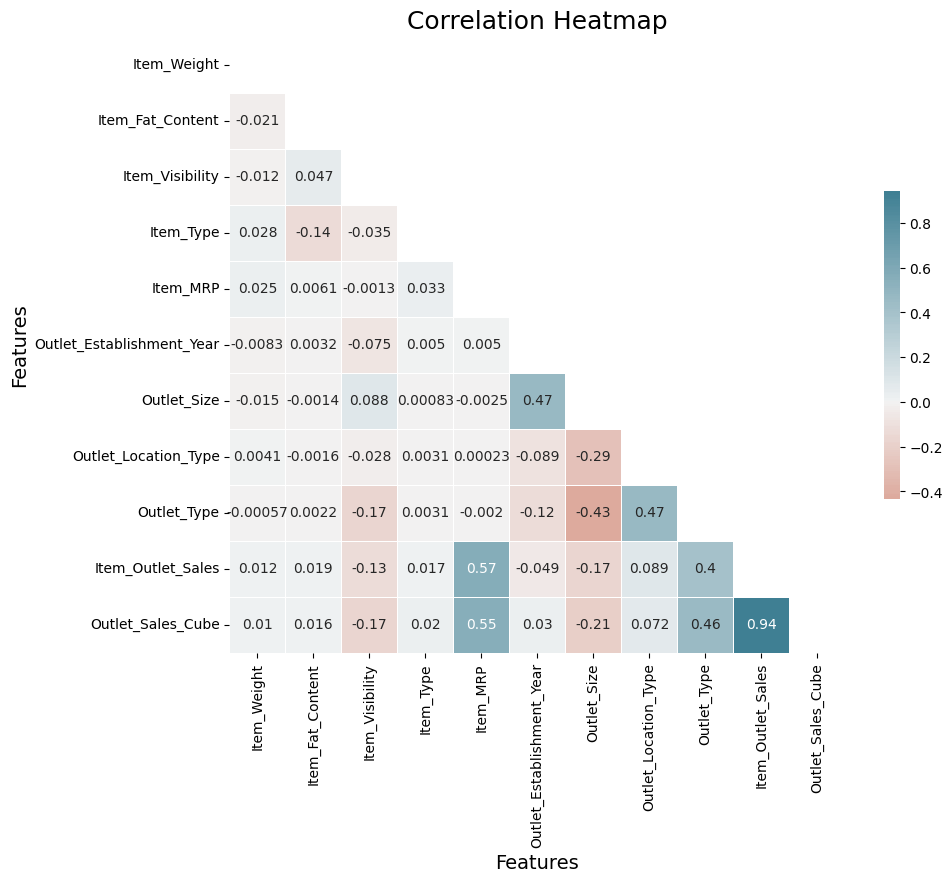

In [314]:
   # Subset the dataset to include only the relevant columns
subset = train[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP',
             'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
             'Item_Outlet_Sales','Outlet_Sales_Cube']]

# Calculate the correlation matrix
corr = subset.corr()

# Create a mask for the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 8))

# Generate the heatmap with green and white colors
sns.heatmap(corr, mask=mask, annot=True, cmap=sns.diverging_palette(20, 220, n=200),
            center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Set the title and labels for the plot
ax.set_title("Correlation Heatmap", fontsize=18)
ax.set_xlabel("Features", fontsize=14)
ax.set_ylabel("Features", fontsize=14)

# Show the plot
plt.show()

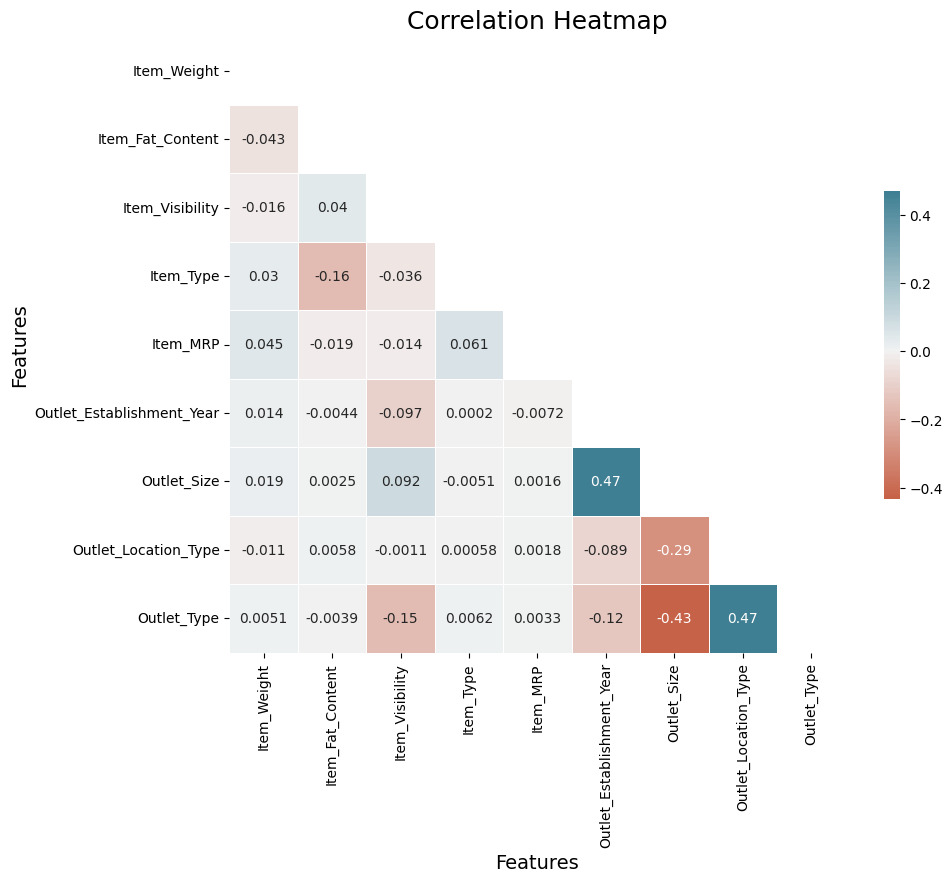

In [315]:
# Subset the dataset to include only the relevant columns
subset = test[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP',
             'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']]

# Calculate the correlation matrix
corr = subset.corr()

# Create a mask for the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 8))

# Generate the heatmap with green and white colors
sns.heatmap(corr, mask=mask, annot=True, cmap=sns.diverging_palette(20, 220, n=200),
            center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Set the title and labels for the plot
ax.set_title("Correlation Heatmap", fontsize=18)
ax.set_xlabel("Features", fontsize=14)
ax.set_ylabel("Features", fontsize=14)

# Show the plot
plt.show()

In [316]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Sales_Square,Outlet_Sales_Cube
0,156,9.30,0,0.016047,4,249.8092,9,1999,1.0,0,1,3735.1380,15.515611,15.515611
1,8,5.92,1,0.019278,14,48.2692,3,2009,1.0,2,2,443.4228,7.625576,7.625576
2,662,17.50,0,0.016760,10,141.6180,9,1999,1.0,0,1,2097.2700,12.800240,12.800240
3,1121,19.20,1,0.000000,6,182.0950,0,1998,3.0,2,0,732.3800,9.013888,9.013888
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0.0,2,1,994.7052,9.982319,9.982319


In [317]:
train['Outlet_Age']=train['Outlet_Establishment_Year'].apply(lambda year: 2024-year)

# creates a new column named Outlet_Age in the train DataFrame.

In [318]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Sales_Square,Outlet_Sales_Cube,Outlet_Age
0,156,9.30,0,0.016047,4,249.8092,9,1999,1.0,0,1,3735.1380,15.515611,15.515611,25
1,8,5.92,1,0.019278,14,48.2692,3,2009,1.0,2,2,443.4228,7.625576,7.625576,15
2,662,17.50,0,0.016760,10,141.6180,9,1999,1.0,0,1,2097.2700,12.800240,12.800240,25
3,1121,19.20,1,0.000000,6,182.0950,0,1998,3.0,2,0,732.3800,9.013888,9.013888,26
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0.0,2,1,994.7052,9.982319,9.982319,37


In [319]:
train=train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Item_Outlet_Sales','Outlet_Size','Item_Weight'],axis=1)

#removes several columns from the train DataFrame

In [320]:
train=train.drop(['Item_Visibility','Outlet_Sales_Square'],axis=1)

#removes several columns from the train DataFrame

In [321]:
train.head()

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Location_Type,Outlet_Type,Outlet_Sales_Cube,Outlet_Age
0,0,4,249.8092,0,1,15.515611,25
1,1,14,48.2692,2,2,7.625576,15
2,0,10,141.6180,0,1,12.800240,25
3,1,6,182.0950,2,0,9.013888,26
4,0,9,53.8614,2,1,9.982319,37


In [322]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1.0,0,1
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,3.0,1,1
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,3.0,2,0
3,809,7.315000,0,0.015388,13,155.0340,2,2007,3.0,1,1
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1.0,2,3


In [323]:
test['Outlet_Age']=test['Outlet_Establishment_Year'].apply(lambda year: 2024-year)

#creates a new column named Outlet_Age in the train DataFrame.

In [324]:
test=test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Item_Weight'],axis=1)

#removes several columns from the test DataFrame

In [325]:
test=test.drop(['Item_Visibility'],axis=1)

In [326]:
test.head()

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,0,13,107.8622,0,1,25
1,1,4,87.3198,1,1,17
2,0,11,241.7538,2,0,26
3,0,13,155.0340,1,1,17
4,1,4,234.2300,2,3,39


In [327]:
from sklearn.preprocessing import StandardScaler

#This class is used to standardize features by removing the mean and scaling them to unit variance

In [328]:
x=train[['Item_Fat_Content','Item_Type','Item_MRP','Outlet_Location_Type','Outlet_Type','Outlet_Age']]
y=train['Outlet_Sales_Cube']

In [329]:
scaler=StandardScaler()

# sets up the scaler that will be used to standardize the dataset, ensuring that all features contribute equally to the machine learning model

In [330]:
x=scaler.fit_transform(x)
#used to standardize the feature set x

In [331]:
x=pd.DataFrame(x)

In [332]:
x.head()

,0,1,2,3,4,5
0,-0.738147,-0.766479,1.747454,-1.369334,-0.252658,-0.139541
1,1.354743,1.608963,-1.489023,1.091569,1.002972,-1.334103
2,-0.738147,0.658786,0.010040,-1.369334,-0.252658,-0.139541
3,1.354743,-0.291391,0.660050,1.091569,-1.508289,-0.020085
4,-0.738147,0.421242,-1.399220,1.091569,-0.252658,1.293934


In [333]:
from sklearn.preprocessing import StandardScaler

#This class is used to standardize features by removing the mean and scaling them to unit variance

In [341]:
X=train[['Item_Fat_Content','Item_Type','Item_MRP','Outlet_Location_Type','Outlet_Type','Outlet_Age']]

In [342]:
scaler=StandardScaler()

# sets up the scaler that will be used to standardize the dataset, ensuring that all features contribute equally to the machine learning model

In [343]:
X=scaler.fit_transform(x)
#used to standardize the feature set x

In [344]:
X=pd.DataFrame(x)

In [345]:
X.head()

,0,1,2,3,4,5
0,-0.738147,-0.766479,1.747454,-1.369334,-0.252658,-0.139541
1,1.354743,1.608963,-1.489023,1.091569,1.002972,-1.334103
2,-0.738147,0.658786,0.010040,-1.369334,-0.252658,-0.139541
3,1.354743,-0.291391,0.660050,1.091569,-1.508289,-0.020085
4,-0.738147,0.421242,-1.399220,1.091569,-0.252658,1.293934


In [339]:
from sklearn.linear_model import LinearRegression
# For evaluating the models using the metrics
from sklearn.metrics import r2_score as R2
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.model_selection  import cross_val_score as CVS

In [346]:
# Define the linear regression model
lr = LinearRegression()

# Train the model on the training data
lr.fit(X, y)

# Precting the model using the test set
y_predict = lr.predict(X)

# Evaluating the training set with the metric values

print("R-Square value on the training set: = ", lr.score(x,y))
print("----------------------------------------------------------------------------------------------")

# Use cross-validation to get the R-squared score
scores = CVS(lr, X, y, cv=5)
print('CV R-squared scores:', scores,"\n")
print('Average CV R-squared score:', np.mean(scores),"\n")

R-Square value on the training set: =  0.5479170954222314
----------------------------------------------------------------------------------------------
CV R-squared scores: [0.55720549 0.56274019 0.52765011 0.53782978 0.54762596] 

Average CV R-squared score: 0.5466103056990158 



In [347]:
import pickle

In [348]:
Bigmart= "BigMart_Analysis.sav"
pickle.dump(lr, open(Bigmart,'wb'))

## SUMMARY
*   The "BigMart Sales Analysis" is a popular machine learning project that involves predicting sales for a retail company based on historical data. The dataset usually includes information about various products and outlets, and the goal is to predict the sales of products across different stores. Here's a summary of the steps typically involved in this project:

1. *Understanding the Problem*
   - *Objective:* Predict the sales for each product at a particular store based on various features like the type of product, the type of store, and certain characteristics of both.
   - *Evaluation Metric:* Commonly, the Root Mean Squared Error (RMSE) is used to evaluate the accuracy of the predictions.

2. *Exploratory Data Analysis (EDA)*
   - *Understand the Data:* Examine the structure, summary statistics, and distribution of features.
   - *Visualizations:* Create plots to understand relationships between features, such as:
     - Histograms to understand the distribution of sales.
     - Box plots to identify outliers.
     - Scatter plots to explore correlations between sales and numerical features like MRP (Maximum Retail Price).
   - *Missing Values:* Identify and analyze missing values. Decide how to handle them (imputation or removal).   

3. *Data Preprocessing*
   - *Handling Missing Values:* Impute missing values for features like "Item_Weight" and "Outlet_Size."
   - *Categorical Variable Encoding:* Use label encoding, one-hot encoding, or target encoding for categorical features such as "Outlet_Type," "Item_Fat_Content," etc.
   - *Feature Scaling:* Normalize or standardize numerical features if necessary, especially if using models sensitive to feature scaling (like KNN, SVM).
   - *Outlier Treatment:* Identify and handle outliers in the dataset.
4. *Feature Engineering*
   - *Creating New Features:*
     - *Year of Operation:* Derive the number of years since the store was established using "Outlet_Establishment_Year."
     - *Item Category:* Create new features that categorize items (e.g., Food, Non-Food).
     - *Price per Unit Weight:* If the dataset provides weight and MRP, derive a feature like MRP per unit weight.
   - *Feature Interaction:* Create interaction terms between relevant features (e.g., interaction between "Item_Type" and "Outlet_Type").

5. *Model Evaluation*
   - *Cross-Validation:* Use cross-validation to ensure that the model generalizes well to unseen data.
   - *Metrics:* Evaluate model performance using metrics like RMSE, Mean Absolute Error (MAE), and R-squared.
   - *Model Comparison:* Compare the performance of different models and select the best one based on validation scores.

### Dataset Structure
Typically, the dataset contains the following columns:
- *Item_Identifier:* Unique identifier for each product.
- *Item_Weight:* Weight of the product.
- *Item_Fat_Content:* Whether the product is low-fat or regular.
- *Item_Visibility:* The percentage of total display area allocated to this product in the store.
- *Item_Type:* The category to which the product belongs.
- *Item_MRP:* Maximum Retail Price (MRP) of the product.
- *Outlet_Identifier:* Unique identifier for each store.
- *Outlet_Establishment_Year:* The year the store was established.
- *Outlet_Size:* The size of the store in terms of area.
- *Outlet_Location_Type:* The type of area in which the store is located (e.g., Tier 1, Tier 2).
- *Outlet_Type:* The type of store (e.g., Supermarket, Grocery store).
- *Item_Outlet_Sales:* The sales of the product in the particular store (target variable).

### Learning Outcomes
- *Data Handling:* You'll learn how to clean and preprocess real-world data.
- *Feature Engineering:* You'll gain experience in creating meaningful features that improve model performance.
- *Modeling:* You'll understand how to apply different machine learning algorithms and evaluate their performance.
- *Interpretation:* You'll learn how to interpret complex models and explain their decisions to non-technical stakeholders.